In [37]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image

In [38]:
dataset= r'train-data-after-RFE-20.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [39]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.5, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [40]:
feature_names = list(data.columns[:-1])

In [41]:
# # 定义符号回归模型，并使用训练数据拟合模型
# reg = SymbolicRegressor(population_size=5000, generations=100, verbose=1,
#                          function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
#                                        'inv', 'max', 'min', 'sin', 'cos', 'tan'],
#                          metric='mean absolute error', stopping_criteria=0.001,
#                          random_state=0)
# reg.fit(X_train, y_train)

# 创建符号分类器
reg = SymbolicClassifier(population_size=5000, generations=30, tournament_size=20,
                         stopping_criteria=0.0, const_range=(-1.0, 1.0), verbose=1)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.69          1.49718       63         0.151656              N/A      1.64m
   1    22.52         0.881553       55        0.0703491              N/A      1.31m
   2    43.50          1.09877       65       0.00112304              N/A      1.47m
   3    56.71          1.24404       87      0.000426882              N/A      1.52m
   4    60.33          1.39519       77      2.59484e-06              N/A      1.91m
   5    57.18           1.9194       85      2.45082e-08              N/A      1.49m
   6    50.29          2.30817       49      2.00342e-07              N/A      1.36m
   7    43.29          2.00291       69      1.27774e-12              N/A      1.25m
   8    34.14          1.57728       71      1.04678e-15              N/A  

SymbolicClassifier(generations=30, population_size=5000, verbose=1)

In [42]:
print(set(str(reg._program).split()))

{'0.142),', '0.142)', 'X19),', 'div(div(div(sub(X8,'}


Confusion Matrix:
[[2 0]
 [1 4]]


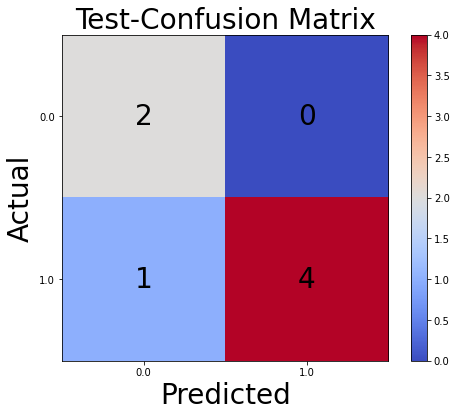

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = reg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="coolwarm")
# 图像标题和标签
plt.title("Test-Confusion Matrix", fontsize=28)
plt.colorbar()
plt.xlabel("Predicted", fontsize=28)
plt.ylabel("Actual", fontsize=28)
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=28)
plt.savefig('混淆矩阵-test.png',dpi=1000)
plt.show()


Confusion Matrix:
[[4 0]
 [0 3]]


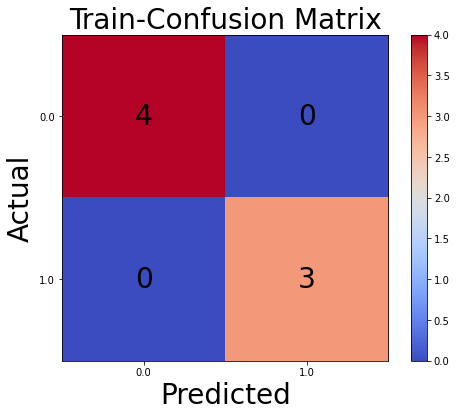

In [44]:
# from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Prediction on test set
# y_pred = reg.predict(X_train)

# # Confusion matrix
# cm = confusion_matrix(y_train, y_pred)
# print("Confusion Matrix:")
# print(cm)

# plt.imshow(cm, cmap="Blues")
# plt.title("Confusion Matrix")
# plt.colorbar()
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.xticks(np.arange(len(set(y))), set(y))
# plt.yticks(np.arange(len(set(y))), set(y))

# # Adding text to the confusion matrix cells with larger font size
# for i in range(len(set(y))):
#     for j in range(len(set(y))):
#         plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)
# plt.savefig('有NLP的train.png')
# plt.show()

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = reg.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="coolwarm")
# 图像标题和标签
plt.title("Train-Confusion Matrix", fontsize=28)
plt.colorbar()
plt.xlabel("Predicted", fontsize=28)
plt.ylabel("Actual", fontsize=28)
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=28)
plt.savefig('混淆矩阵-train.png',dpi=1000)
plt.show()


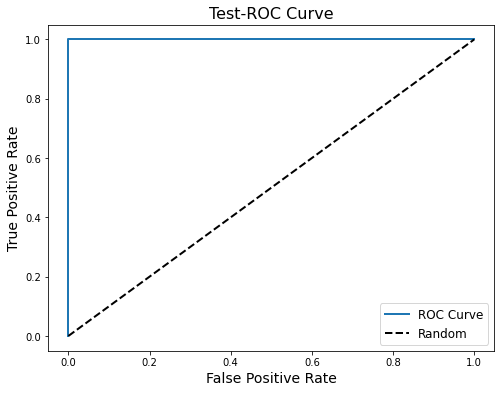

Accuracy: 0.8571428571428571


In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve
y_probs = reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 设置图像大小
plt.figure(figsize=(8, 6))  # 设置为 8x6 英寸，可以根据需求调整

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)

# 图像的标题和标签
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Test-ROC Curve', fontsize=16)

# 显示图例
plt.legend(fontsize=12)

# 保存图像并提高清晰度
plt.savefig('ROC_Test.png', dpi=300)  # 设置 dpi=300 提高图像的分辨率

# 展示图像
plt.show()

# Accuracy
accuracy = reg.score(X_test, y_test)
print("Accuracy:", accuracy)


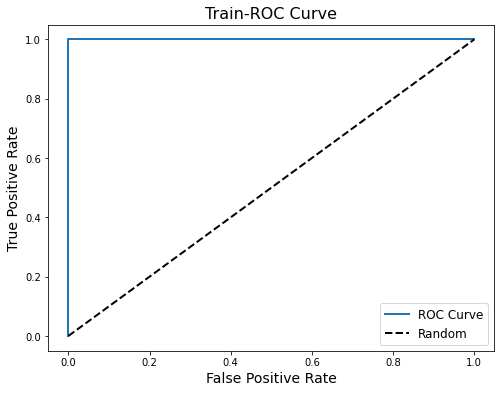

Accuracy: 1.0


In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve
y_probs = reg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# 设置图像大小
plt.figure(figsize=(8, 6))  # 设置为 8x6 英寸，可以根据需求调整

# 绘制 ROC 曲线
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)

# 图像的标题和标签
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Train-ROC Curve', fontsize=16)

# 显示图例
plt.legend(fontsize=12)

# 保存图像并提高清晰度
plt.savefig('ROC_Train.png', dpi=300)  # 设置 dpi=300 提高图像的分辨率

# 展示图像
plt.show()

# Accuracy
accuracy = reg.score(X_train, y_train)
print("Accuracy:", accuracy)


In [71]:
# 打印符号回归公式
print("Fitted symbolic equation:")
print(best_program)

# 手动构建 Graphviz 格式的字符串
def build_dot(program):
    # 获取程序的字符串表示（符号表达式）
    expression = str(program)
    
    # 初始化图的DOT格式
    dot_string = "digraph G {\n"
    
    # 以每个符号表达式为节点
    nodes = expression.split()
    node_id = 0
    node_map = {}
    
    for node in nodes:
        node_map[node_id] = node
        dot_string += f'  node{node_id} [label="{node}"];\n'
        node_id += 1
    
    # 假设树的结构是线性的，逐一连接每个节点
    for i in range(1, len(nodes)):
        dot_string += f'  node{i-1} -> node{i};\n'
    
    dot_string += "}\n"
    
    return dot_string

# 获取 Graphviz 格式的 DOT 字符串
dot_string = build_dot(best_program)

# 使用 Graphviz 渲染和显示符号树
graph = graphviz.Source(dot_string)
graph.render("symbolic_tree", format="png", view=True)

Fitted symbolic equation:
div(div(div(sub(X8, X19), 0.142), 0.142), 0.142)


'symbolic_tree.png'

Name: graphviz
Version: 0.19.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: /public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pickle

# 保存训练好的模型
with open('symbol_classifier.pkl', 'wb') as file:
    pickle.dump(reg, file)

#

In [24]:
pickle.dump(reg,open("reg.dat","wb"))

In [64]:
import pickle

# 加载训练好的模型
with open('symbol_classifier.pkl', 'rb') as file:
    reg = pickle.load(file)


In [65]:
# 打印拟合的符号回归公式
print("Fitted symbolic equation:")
print(reg._program)


Fitted symbolic equation:
div(div(div(sub(X8, X19), 0.142), 0.142), 0.142)
